Spotify is a digital music service that gives you access to millions of songs.Artists upload their songs or albums and people get access to their music through the app. Songs and artists with the most streams generate royalties or investments in exclusive content. Spotify identifies songs with the most streams and also predicts which songs are likely to be hits based on the artists popularity or time of release.It also understands how listener preferences change over time. This dataset contains the most popular songs in 2023. It shows the spotify stream count,the release dates,the track name and the artist name. From this dataset, we want to get the most popular artist,most popular songs,average streams per year,songs with the highest stream counts and which top artists who consistently produces hits.

To be able to run the data we obtained about Spotify,we need to first import the necessary tools to run the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

Then load the Dataset

In [3]:
file_path=r"C:\Users\User\Documents\Phase1_Project\Popular_Spotify_Songs.csv"
with open(file_path, encoding="latin1") as file:
    reader = csv.DictReader(file)
    for row in reader:
        row

In [4]:
df=pd.read_csv(r"C:\Users\User\Documents\Phase1_Project\Popular_Spotify_Songs.csv",encoding="latin1")
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


We need a summary of our data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

The data we have has 953 rows representing a unique song with its features, and has 24 columns representing track name, artist name, released year and streams counts. Some columns like in_shazam charts and key have 903 and 858 non null values which raises questions about the accuracy of our data. The data has missing values and we need to clean it to have a clear analysis of the data. 

To clean our data we first check for null values.

In [6]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In shazam charts has 50 missing values and key has 95 missing values. To clean our data we need to drop this missing values.

In [7]:
df.dropna(inplace=True)

In [8]:
print(df["streams"].dtype)


object


In [9]:
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")


In [10]:
pd.set_option("display.float_format", "{:.2f}".format)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            817 non-null    object 
 1   artist(s)_name        817 non-null    object 
 2   artist_count          817 non-null    int64  
 3   released_year         817 non-null    int64  
 4   released_month        817 non-null    int64  
 5   released_day          817 non-null    int64  
 6   in_spotify_playlists  817 non-null    int64  
 7   in_spotify_charts     817 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    817 non-null    int64  
 10  in_apple_charts       817 non-null    int64  
 11  in_deezer_playlists   817 non-null    object 
 12  in_deezer_charts      817 non-null    int64  
 13  in_shazam_charts      817 non-null    object 
 14  bpm                   817 non-null    int64  
 15  key                   817 no

After dropping the missing values, the data now has 817 rows instead of 953. The missing values we dropped, and the data is clear

Data Analysis

In [12]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.00,817.00,817.00,817.00,817.00,817.00,816.00,817.00,817.00,817.00,817.00,817.00,817.00,817.00,817.00,817.00,817.00,817.00
mean,1.57,2018.46,6.02,13.70,4849.90,11.72,468985764.41,60.16,49.47,2.45,122.57,67.39,51.20,64.36,26.31,1.68,18.17,10.53
std,0.88,10.83,3.57,9.30,7741.13,18.62,523126748.21,74.92,49.57,5.40,28.17,14.69,23.62,16.11,25.47,8.77,13.54,10.22
min,1.00,1930.00,1.00,1.00,31.00,0.00,2762.00,0.00,0.00,0.00,65.00,23.00,4.00,14.00,0.00,0.00,3.00,2.00
25%,1.00,2021.00,3.00,5.00,829.00,0.00,134284821.00,12.00,6.00,0.00,99.00,57.00,32.00,53.00,5.00,0.00,10.00,4.00
50%,1.00,2022.00,5.00,13.00,2040.00,3.00,263836779.50,32.00,34.00,0.00,120.00,70.00,51.00,66.00,17.00,0.00,12.00,6.00
75%,2.00,2022.00,9.00,22.00,4890.00,16.00,601198591.25,78.00,84.00,2.00,141.00,79.00,70.00,76.00,41.00,0.00,24.00,12.00
max,8.00,2023.00,12.00,31.00,52898.00,147.00,3562543890.00,532.00,275.00,45.00,206.00,96.00,97.00,97.00,97.00,91.00,97.00,64.00


    The average stream count for this data is 468.98 million streams. On average, songs in this dataset were released around mid-June. The average release year for this data is 2018, suggesting most hit songs were released around this time. The latest songs from this data are from the year 2023, while the oldest date to 1930. The streams feature shows high variance, indicating that some songs are extremely popular while others have very few streams. The maximum stream count is 3.5 billion streams while lowest 2762 streams showing a big difference between popular songs and non popular songs.

Data Insights

Under the data insights, we would like to know the most popular artists on Spotify by streams to highlight the dominant artists in terms of popularity. We also like to know the most streamed songs on Spotify to identify the top hit track in the dataset and provide insights into the ultimate listener preference. W also get the average streams per year to check how popularity of songs changes over time.

Most popular artists on Spotify by streams.

In [13]:
most_popular_artists = (df.groupby("artist(s)_name")["streams"].sum().sort_values(ascending=False))
print("Most popular artists:\n", most_popular_artists.head())


Most popular artists:
 artist(s)_name
Taylor Swift   11851151082.00
Ed Sheeran     11051252012.00
Bad Bunny       8582384095.00
Eminem          6183805596.00
The Weeknd      6038640754.00
Name: streams, dtype: float64


By identifying the most popular artist, we can see which musicians consistently capture the audience’s attention and hold the largest share of streams.Taylor Swift is the most popular artist in Spotify with 1.18 billion streams followed by Ed Sheeran with 1.1 billion streams, then Bad Bunny with 858 million streams. Eminem follows with 618 million streams, then The Weeknd with 603 million streams. Taylor Swift captures attention on Spotify and has the most streams.

Top artists that produced the most hits on Spotify.

In [14]:
number_of_hits_per_artist=(df["artist(s)_name"].value_counts().head())
print(number_of_hits_per_artist)

artist(s)_name
Taylor Swift      29
SZA               17
Bad Bunny         16
The Weeknd        15
Kendrick Lamar    12
Name: count, dtype: int64


Taylor Swift has a total of 34 hit songs on the Popular Spotify songs list followed by The Weeknd with 22  hit songs, then Bad Bunny and SZA with 19 hit songs,then Harry Styles with 17 songs. Hence Taylor Swift has the most hits on Spotify. A song released by Taylor Swift or SZA is likely to become a hit because the artists have most released hits and are also popular.

Most streamed songs on Spotify

In [15]:
top_songs = df.groupby("track_name")["streams"].sum().sort_values(ascending=False).head(5)
print(top_songs)


track_name
Shape of You                                    3562543890.00
Sunflower - Spider-Man: Into the Spider-Verse   2808096550.00
One Dance                                       2713922350.00
STAY (with Justin Bieber)                       2665343922.00
Believer                                        2594040133.00
Name: streams, dtype: float64


The top 5 most steamed songs on Spotify is Shape of You with 3.5 billion streams, Sunflower with 2.8 billion streams,One Dance with 2.71 billion streams and Stay with 2.6 billion streams. Shape of you by Ed Sheeran is the most streamed song on Spotify.

Average streams per year

In [16]:
df = df[df["released_year"] >= 2000]
avg_streams_per_year = (df.groupby("released_year")["streams"] .mean() .sort_index())
print(avg_streams_per_year)

released_year
2000   1224285700.33
2002   1446620470.50
2003   1584021370.50
2004    952664875.33
2005    180577478.00
2008   1240407950.00
2010   1048400819.17
2011    878452623.44
2012   1029740974.67
2013   1362225297.20
2014   1275126822.67
2015    910423256.33
2016   1135476212.53
2017   1497372434.68
2018   1349253397.33
2019    858923124.44
2020    784012453.13
2021    548942993.67
2022    279439530.51
2023    143932389.40
Name: streams, dtype: float64


The average streams per year was the highest between 2012 and 2018 with streams above 1 billion. This shows that during this period, massively popular songs were released.The average streams per year have also increased since 2000, showing that newer songs tend to get more streams, likely due to the growth of Spotify and the streaming culture. However, some older songs like Yellow	by Chris Molitor still dominate the top streams, creating spikes in certain years.

Visualizations

Bar chart showing most popular artists on Spotify by streams

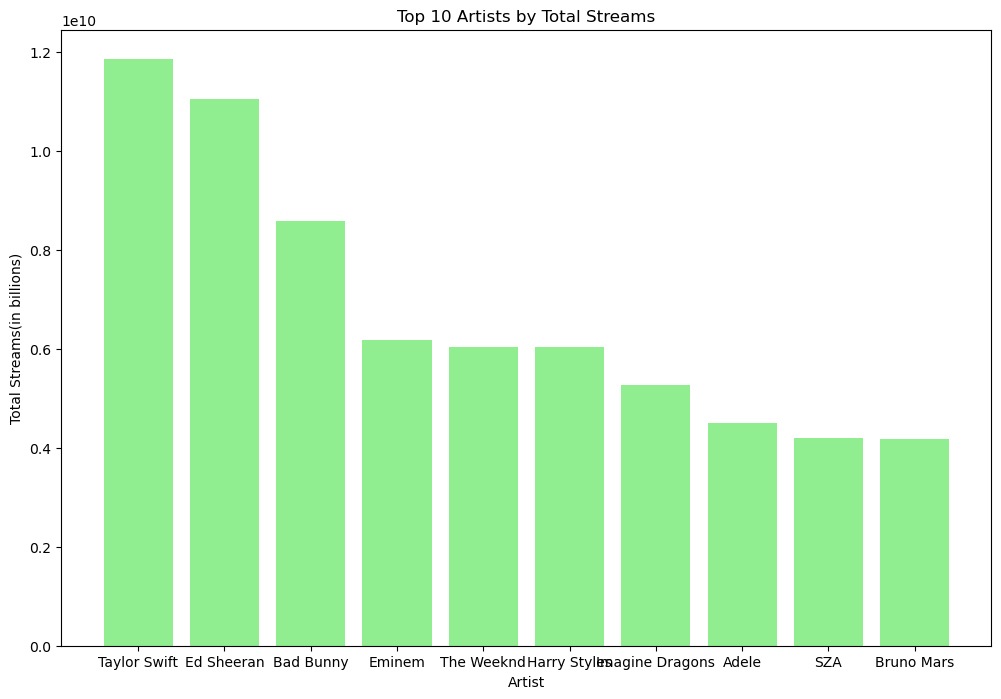

In [ ]:
artist_streams = (
    df.groupby("artist(s)_name")["streams"].sum()
      .sort_values(ascending=False)[:10])

plt.figure(figsize=(12,8))
plt.bar(artist_streams.index, artist_streams.values, color=("red"))
plt.title("Top 10 Artists by Total Streams")
plt.xlabel("Artist")
plt.ylabel("Total Streams(in billions)")
plt.show()

Artists like Taylor Swift, Ed Sheeran, The Weeknd appear multiple times to mean that popular artists consistently produce high-stream songs. A song featured by Taylor Swift and Ed Sheeran is likely to hit the chats because they are popular. Same to a son released by The Weeknd and Eminem or Harry Styles.

Trendline showing average streams per release year

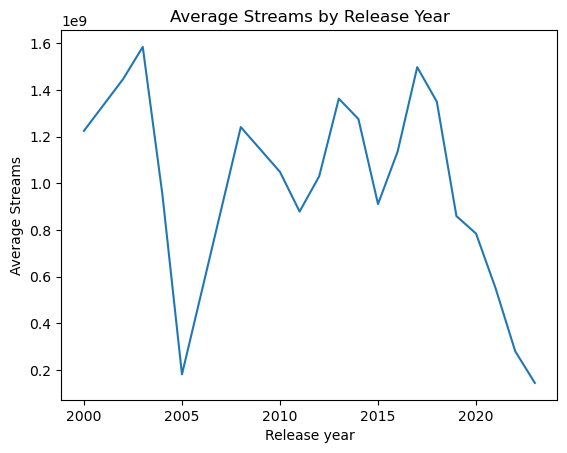

In [18]:
avg_per_year = df.groupby("released_year")["streams"].mean()
avg_per_year.plot(kind="line", marker=" ")
plt.xlabel("Release year")
plt.ylabel("Average Streams")
plt.title("Average Streams by Release Year")
plt.show()


In [19]:
year_2003 = df[df["released_year"] == 2003]
print(year_2003.head())

         track_name artist(s)_name  artist_count  released_year  \
331            Numb    Linkin Park             1           2003   
630  Mr. Brightside    The Killers             1           2003   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
331               3            24                 20111                  5   
630               9            23                 51979                 15   

          streams  in_apple_playlists  ...  bpm key   mode danceability_%  \
331 1361425037.00                  39  ...  110   A  Major             50   
630 1806617704.00                 306  ...  148  C#  Major             35   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
331         24       86              0                   0          64   
630         24       93              0                   0          10   

     speechiness_%  
331              4  
630              8  

[2 rows x 24 columns]


It is clear that songs like Numb and Mr.Brightside released in 2003 had the most streams in average over the years with both songs having more than a billion streams in 1 year.It is also clear that songs released in 2005 did not get as much streams hence a sharp drop. There is a huge stream growth in songs released from 2010 to 2020, showing most popular songs on Spotify were released during this time. 

Bar chat showing top 10 most streamed songs 

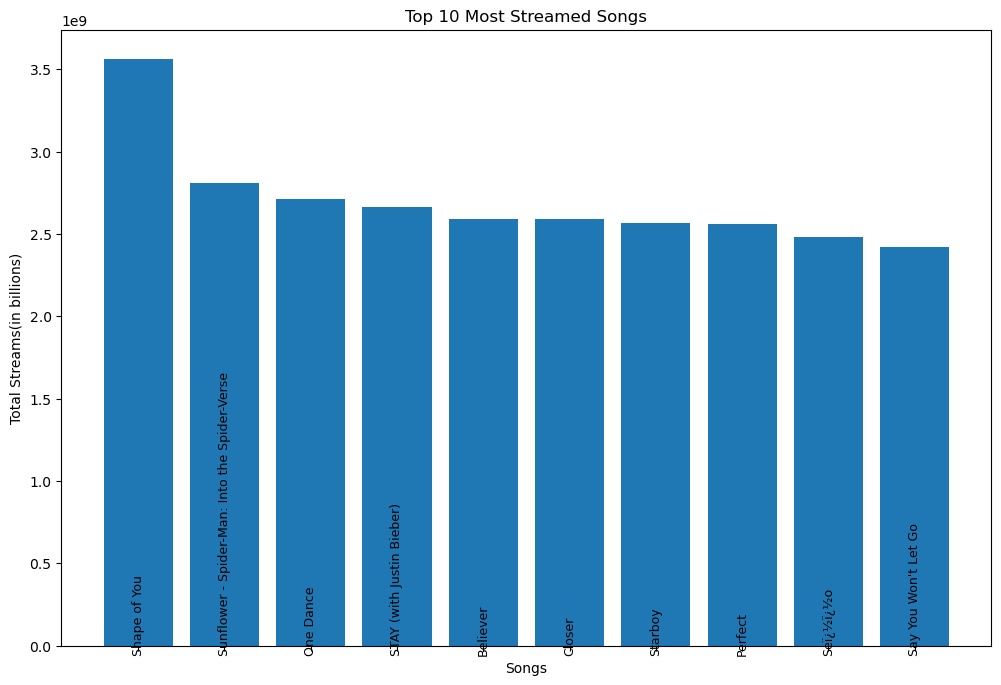

In [20]:
top_songs = df.groupby("track_name")["streams"].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,8))
plt.bar(top_songs.index, top_songs.values)
plt.xticks(ha="center", va="bottom",fontsize=9, rotation=90)  
plt.xlabel("Songs")
plt.ylabel("Total Streams(in billions)")
plt.title("Top 10 Most Streamed Songs")
plt.show()

Shape of you by Ed Sheeran is the most streamed song on Spotify with 3.5 billion streams followed by Sunflower with 2.8 billion streams,One Dance with 2.71 billion streams and Stay with 2.6 billion streams. 

Conclusion

In conclusion,the average streams per year tend to increase for newer release years, reflecting Spotify’s growth and the popularity of streaming in the 2010s and 2020s.Most popular artists also have the most streams meaning the streams are mostly influenced by the popularity of the artist.Popular artists also influence the number of streams and songs featured with popular artists are likely to have more streams too.